# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"
## LGMVIP Aug-22
## Ayush Dilip Padvekar
## Task -7 Develop A Neural Network That Can Read Handwriting
This project is aimed at creating an ML model that can read handwritten text from images. We will be using Tensorflow and Convolutional Neural Network to develop the model. The dataset to be used is from MNIST under its Handwritten Digit Classification Challenge.

The dataset's link can be found below.

Dataset Link: https://en.wikipedia.org/wiki/MNIST_database

### Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import load_model

### Loading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


### Exploring Dataset

In [3]:
print('X_train shape: ' + str(X_train.shape))
print('Y_train shape: ' + str(y_train.shape))
print('X_test shape:  '  + str(X_test.shape))
print('Y_test shape:  '  + str(y_test.shape))

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


### Exploratory Data Analysis

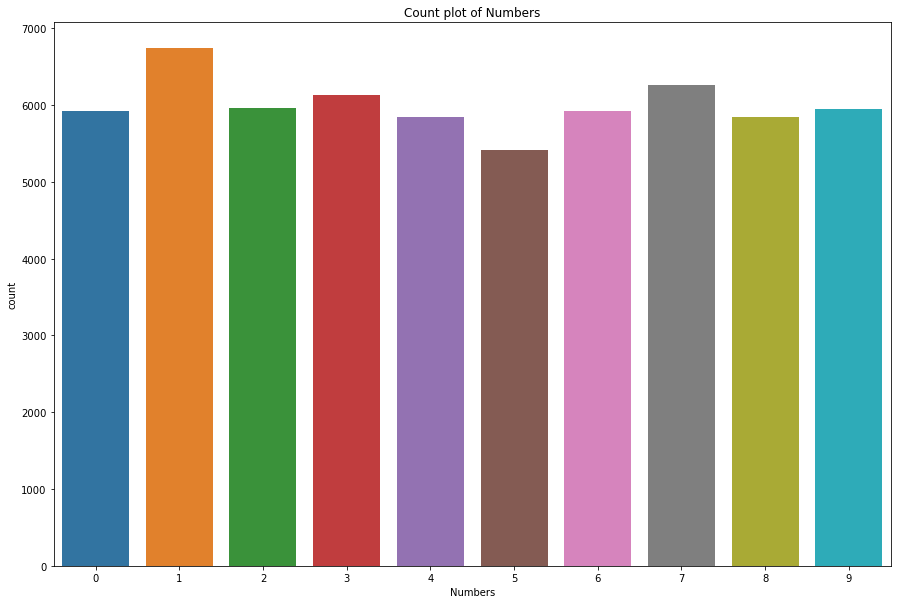

In [4]:
plt.figure(figsize=(15,10))
sns.countplot(y_train)
plt.xlabel('Numbers')
plt.title('Count plot of Numbers');

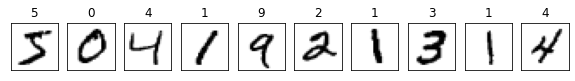

In [5]:
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=False, figsize=(10, 10))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

### Preprocessing Dataset

In [6]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0
classes = 10

### Model Architecture

In [8]:
model = Sequential()
# Convolutional Layers
# 1st Layer
model.add(Conv2D(128, kernel_size=(3,3),
                activation=tf.nn.relu,
                input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#2nd Layer
model.add(Conv2D(64,(3,3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#3rd Layer
model.add(Conv2D(32,(3,3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully Connected Layers
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(classes, activation=tf.nn.softmax))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### Model Training

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=X_train,
                    y=y_train,
                    validation_split=0.1,
                    epochs=10)

Epoch 1/10
1688/1688 [==============================] - 594s 351ms/step - loss: 0.2611 - accuracy: 0.9235 - val_loss: 0.0741 - val_accuracy: 0.9793
Epoch 2/10
1688/1688 [==============================] - 606s 359ms/step - loss: 0.1067 - accuracy: 0.9686 - val_loss: 0.0674 - val_accuracy: 0.9880
Epoch 3/10
1688/1688 [==============================] - 592s 351ms/step - loss: 0.0896 - accuracy: 0.9734 - val_loss: 0.0886 - val_accuracy: 0.9855
Epoch 4/10
1688/1688 [==============================] - 619s 367ms/step - loss: 0.0739 - accuracy: 0.9790 - val_loss: 0.0926 - val_accuracy: 0.9840
Epoch 5/10
1688/1688 [==============================] - 590s 350ms/step - loss: 0.0698 - accuracy: 0.9792 - val_loss: 0.0917 - val_accuracy: 0.9867
Epoch 6/10
1688/1688 [==============================] - 668s 396ms/step - loss: 0.0589 - accuracy: 0.9835 - val_loss: 0.1101 - val_accuracy: 0.9838
Epoch 7/10
1688/1688 [==============================] - 592s 351ms/step - loss: 0.0492 - accuracy: 0.9860 - val_

### Model Evaluation

In [12]:
model_eval = model.evaluate(X_test, y_test)
print("Evaluation Loss: ", model_eval[0])
print("Evaluation Accuracy: " + str(round(model_eval[1]*100,2)) + "%")

313/313 [==============================] - 17s 54ms/step - loss: 0.1447 - accuracy: 0.9799
Evaluation Loss:  0.1447373330593109
Evaluation Accuracy: 97.99%


### Evaluation Plots

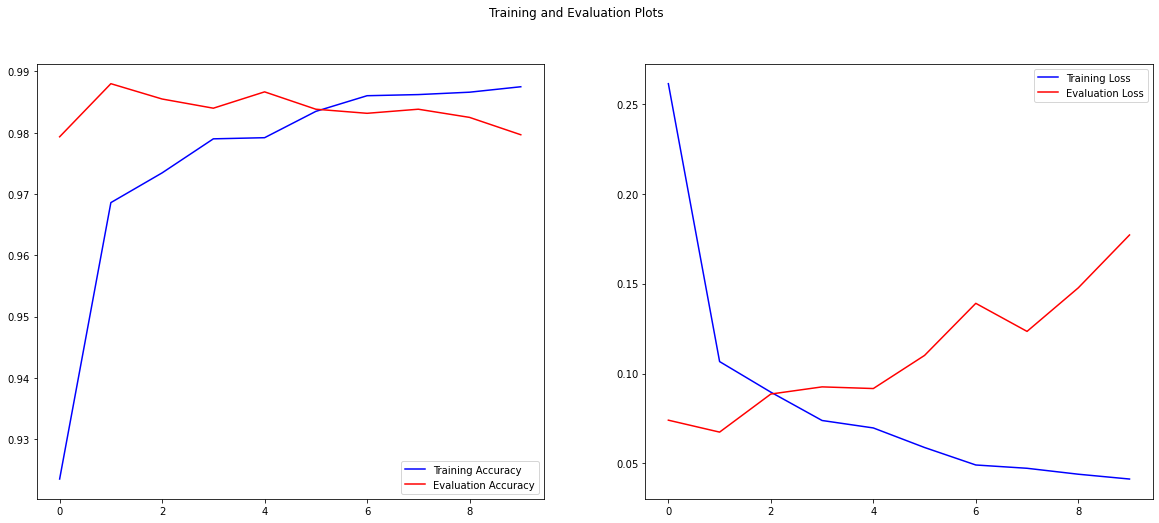

In [13]:
acc = history.history['accuracy']
v_acc = history.history['val_accuracy']
loss = history.history['loss']
v_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].plot(epochs, acc, 'b', label='Training Accuracy')
ax[0].plot(epochs, v_acc, 'r', label='Evaluation Accuracy')
ax[0].legend(loc='best')
ax[1].plot(epochs, loss, 'b', label='Training Loss')
ax[1].plot(epochs, v_loss, 'r', label='Evaluation Loss')
ax[1].legend(loc='best')

plt.suptitle('Training and Evaluation Plots')
plt.show()

### Confusion Matrix

In [14]:
pred = model.predict(X_test)
pred_labels = [np.argmax(i) for i in pred]
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions = pred_labels)
conf_matrix

313/313 [==============================] - 18s 55ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    2,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1131,    0,    2,    0,    2,    0,    0,    0,    0],
       [   1,   17, 1004,    0,    0,    0,    0,   10,    0,    0],
       [   0,    0,    0, 1006,    0,    3,    0,    0,    0,    1],
       [   1,   36,    1,    0,  916,    0,    4,    0,    0,   24],
       [   3,    0,    0,    4,    0,  884,    1,    0,    0,    0],
       [   7,    7,    0,    0,    1,    3,  940,    0,    0,    0],
       [   0,   25,    3,    2,    0,    0,    0,  998,    0,    0],
       [   2,    3,    1,    2,    0,    1,    2,    2,  951,   10],
       [   1,    7,    0,    1,    1,    4,    0,    1,    0,  994]])>

### Heatmap

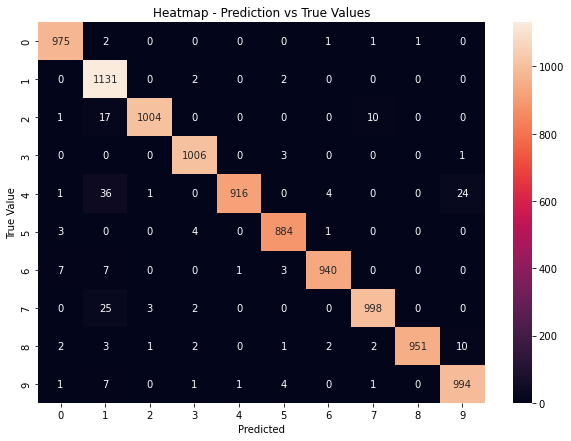

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Heatmap - Prediction vs True Values')
plt.show();

### Model Testing

313/313 [==============================] - 17s 53ms/step
Predicted Value:  3
Correct Prediction!!


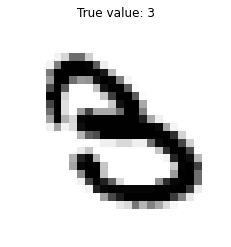

In [17]:
plt.imshow(X_test[18], cmap='gray_r')
plt.title('True value: {}'.format(y_test[18]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[18]))
if(y_test[18]==(np.argmax(pred[18]))):
    print('Correct Prediction!!')
else:
    print('Incorrect Prediction!!')

313/313 [==============================] - 17s 55ms/step
Predicted Value:  0
Correct Prediction!!


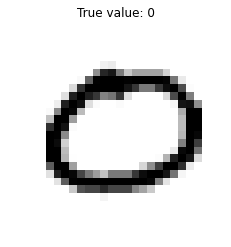

In [18]:
plt.imshow(X_test[69], cmap='gray_r')
plt.title('True value: {}'.format(y_test[69]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[69]))
if(y_test[69]==(np.argmax(pred[69]))):
    print('Correct Prediction!!')
else:
    print('Incorrect Prediction!!')

313/313 [==============================] - 17s 55ms/step
Predicted Value:  9
Correct Prediction!!


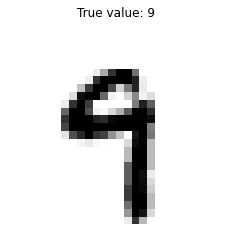

In [19]:
plt.imshow(X_test[108], cmap='gray_r')
plt.title('True value: {}'.format(y_test[108]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[108]))
if(y_test[108]==(np.argmax(pred[108]))):
    print('Correct Prediction!!')
else:
    print('Incorrect Prediction!!')

### Saving the model

In [20]:
model.save('LGMVIPTask7model.h5')